### Data Description
- The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.


- This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
  
### Objective
- Find relationship between various attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why


In [27]:
%%html
<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

### Import the necessary Libraries

In [28]:
# Basic Libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')

## Data Visualization Libraries
import seaborn as sns # data plots and visualization
sns.set(style="white")
sns.set(color_codes=True)
import matplotlib.pyplot as plt # data plots
%matplotlib inline
from IPython.display import HTML


#### Read the data as a data frame

In [29]:
vehicle = pd.read_csv('vehicle.csv')
vehicle.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### Shape of the data

In [30]:
vehicle.shape

(846, 19)

#### Data type of each attribute

In [31]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

#### Data Attributes

In [32]:
 vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

**Vehicle data contains 846 observations with 19 variables, all numerical and one categorical defining the class of the objects.**

The following table gives a brief introduction of all features.

#### Attribute Information
| Attribute                           	| Data Type   	| Description                                                                                                                                                                                                                   	|
|:-------------------------------------	|:-------------	|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| compactness| Numeric| Compactness (Average perimeter ** 2/Area)|
| circularity| Numeric| Circularity (Average radius ** 2/Area)|
| distance_circularity| Numeric| Distance Circularity (Area/Average distance from border ** 2)|
| radius_ratio| Numeric| Radius Ration (Maximum radius - Minimum radius/Average radius)|
| pr.axis_aspect_ratio | Numeric| Principal Axis Aspect Ratio (Minor axis/Major axis)|
| max.length_aspect_ratio| Numeric| Maximum Length Aspect Ratio (Length perpendicular maximum length/ Maximum length)|
| scatter_ratio| Numeric| Scatter Ratio (Inertia about minor axis/Inertia about major axis)|
| elongatedness| Numeric| Elongatedness (Area/Shrink width** 2)|
| pr.axis_rectangularity|Numeric| Pricipal Axis Rectangularity (Area/ Principal axis length * Principal axis width)|
| max.length_rectangularity| Numeric| Max Length Rectangularity (Area/Maximum length * Length perpendicular to this)|
| scaled_variance| Numeric| Scaled Variance Along Major Axis (2nd order moment about minor axis/Area)|
| scaled_variance.1| Numeric|Scaled Variance Along Minor Axis (2nd order moment about major axis/Area)|
| scaled_radius_of_gyration | Numeric| Scaled Radius of Gyration (Maximum variance + Minimum variance/Area)|
| scaled_radius_of_gyration1 | Numeric| Scaled Radius of Gyration 1 (Maximum variance + Minimum variance/Area)|
| skewness_about| Numeric|Skewness|
| skewness_about.1| Numeric|Skewness About Major Axis (3rd order moment about major axis/sigma_minor** 3)|
| skewness_about.2| Numeric|Skewness About Minor Axis (3rd order moment about minor axis/sigma_major** 3)|
| hollows_ratio| Numeric     	| Hollows Ratio (Area of hollows/Area of bounding polygon) where sigma_maj** 2 is the variance along the major axis and sigma_min** 2 is the variance along the minor axis, and area of hollows = area of bounding poly-area of object |
| class | Categorical| Number of Car Classes (3): Car, Bus, Van|

### Exploratory Data Analysis

#### Check for missing value, incorrect data, duplicate data and perform imputation or remove records as necessary

In [33]:
vehicle.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**As the number of non null observations are not equal to the number of entries, there are likely chance of presence of missing values.**

In [34]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing Values in Attributes (if any):")
print(vehicle.apply(num_missing, axis=0))

Missing Values in Attributes (if any):
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [35]:
# Missing Data correction by dropping null values
vehicle.dropna(inplace=True)
vehicle.shape

(813, 19)

Out of 846 records, 33 records were dropped with NaN values. Now only 813 records remain. \
**Note:**
Dropping is only advised to be used if missing values are few (say 0.01–0.5% of our data). Percent is just a rule of thumb.

In [36]:
## Cross Validate for presence of any missing values
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing Values in Attributes (if any):")
print(vehicle.apply(num_missing, axis=0))

Missing Values in Attributes (if any):
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [37]:
# Check if there are rows having ?
vehicle[vehicle['circularity']=="?"] 
vehicle[vehicle['distance_circularity']=="?"] 
vehicle[vehicle['radius_ratio']=="?"] 
vehicle[vehicle['pr.axis_aspect_ratio']=="?"] 
vehicle[vehicle['scatter_ratio']=="?"] 
vehicle[vehicle['elongatedness']=="?"] 
vehicle[vehicle['pr.axis_rectangularity']=="?"] 
vehicle[vehicle['scaled_variance']=="?"] 
vehicle[vehicle['scaled_variance.1']=="?"] 
vehicle[vehicle['scaled_radius_of_gyration']=="?"] 
vehicle[vehicle['scaled_radius_of_gyration.1']=="?"] 
vehicle[vehicle['skewness_about']=="?"] 
vehicle[vehicle['skewness_about.1']=="?"] 
vehicle[vehicle['skewness_about.2']=="?"] 

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

**No Question Mark ("?") sign present in any data attribtes**

**Check for duplicate data**

In [38]:
dups = vehicle.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

vehicle[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

**No duplicate rows exists and hence no duplicate removal step is required**

### Data Summary

#### Descriptive Statistics for Categorical Variables

In [39]:
vehicle.describe(include = ["object"]).transpose()

count unique  top freq
class   813      3  car  413

#### Descriptive Statistics for Numerical Variables

In [40]:
df = vehicle.describe().transpose()
dfStyler = df.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

#### Convert Categorical variable to Numerical Variable

In [41]:
for feature in vehicle.columns:# Loop through all columns in the dataframe
    if vehicle[feature].dtype == 'object': # Only apply for columns with categorical strings
        vehicle[feature] = pd.Categorical(vehicle[feature]) #Replace strings with an integer value 

In [42]:
replaceStruct = {"class": {"bus": 1,"car": 2, "van": 3}}

In [43]:
# Update Original data values with categorical values
vehicle_new = vehicle.replace(replaceStruct)
# Illustrate Top 10 rows of modified data
vehicle_new.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0             176.0              379.0                      184.0   
1             170.0              330.0                      158.0   
2             223.0              635.0                      220.0   
3             160.0              309.0                      127.0   
4             241.0              325.0                      188.0   
6             176.0              361.0                      172.0   
7             162.0              281.0                      164.0   
8             141.0              223.0                      112.0   
10            153.0              266.0                      127.0   
11            148.0              224.0                      118.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                          70.0             6.0              16.0   
1                          72.0             9.0              14.0   
2                          73.0            14.0               9.0   
3                          63.0             6.0              10.0   
4                         127.0             9.0              11.0   
6                          66.0            13.0               1.0   
7                          67.0             3.0               3.0   
8                          64.0             2.0              14.0   
10                         66.0             2.0              10.0   
11                         65.0             5.0              26.0   

    skewness_about.2  hollows_ratio  class  
0              187.0            197      3  
1              189.0            199      3  
2              188.0            196      2  
3            

### Correlation analysis: Pairplots and Correlation (with heatmap)

*PairPlot: To plot multiple pairwise bivariate distributions in a dataset, the pairplot() function is used. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes.*

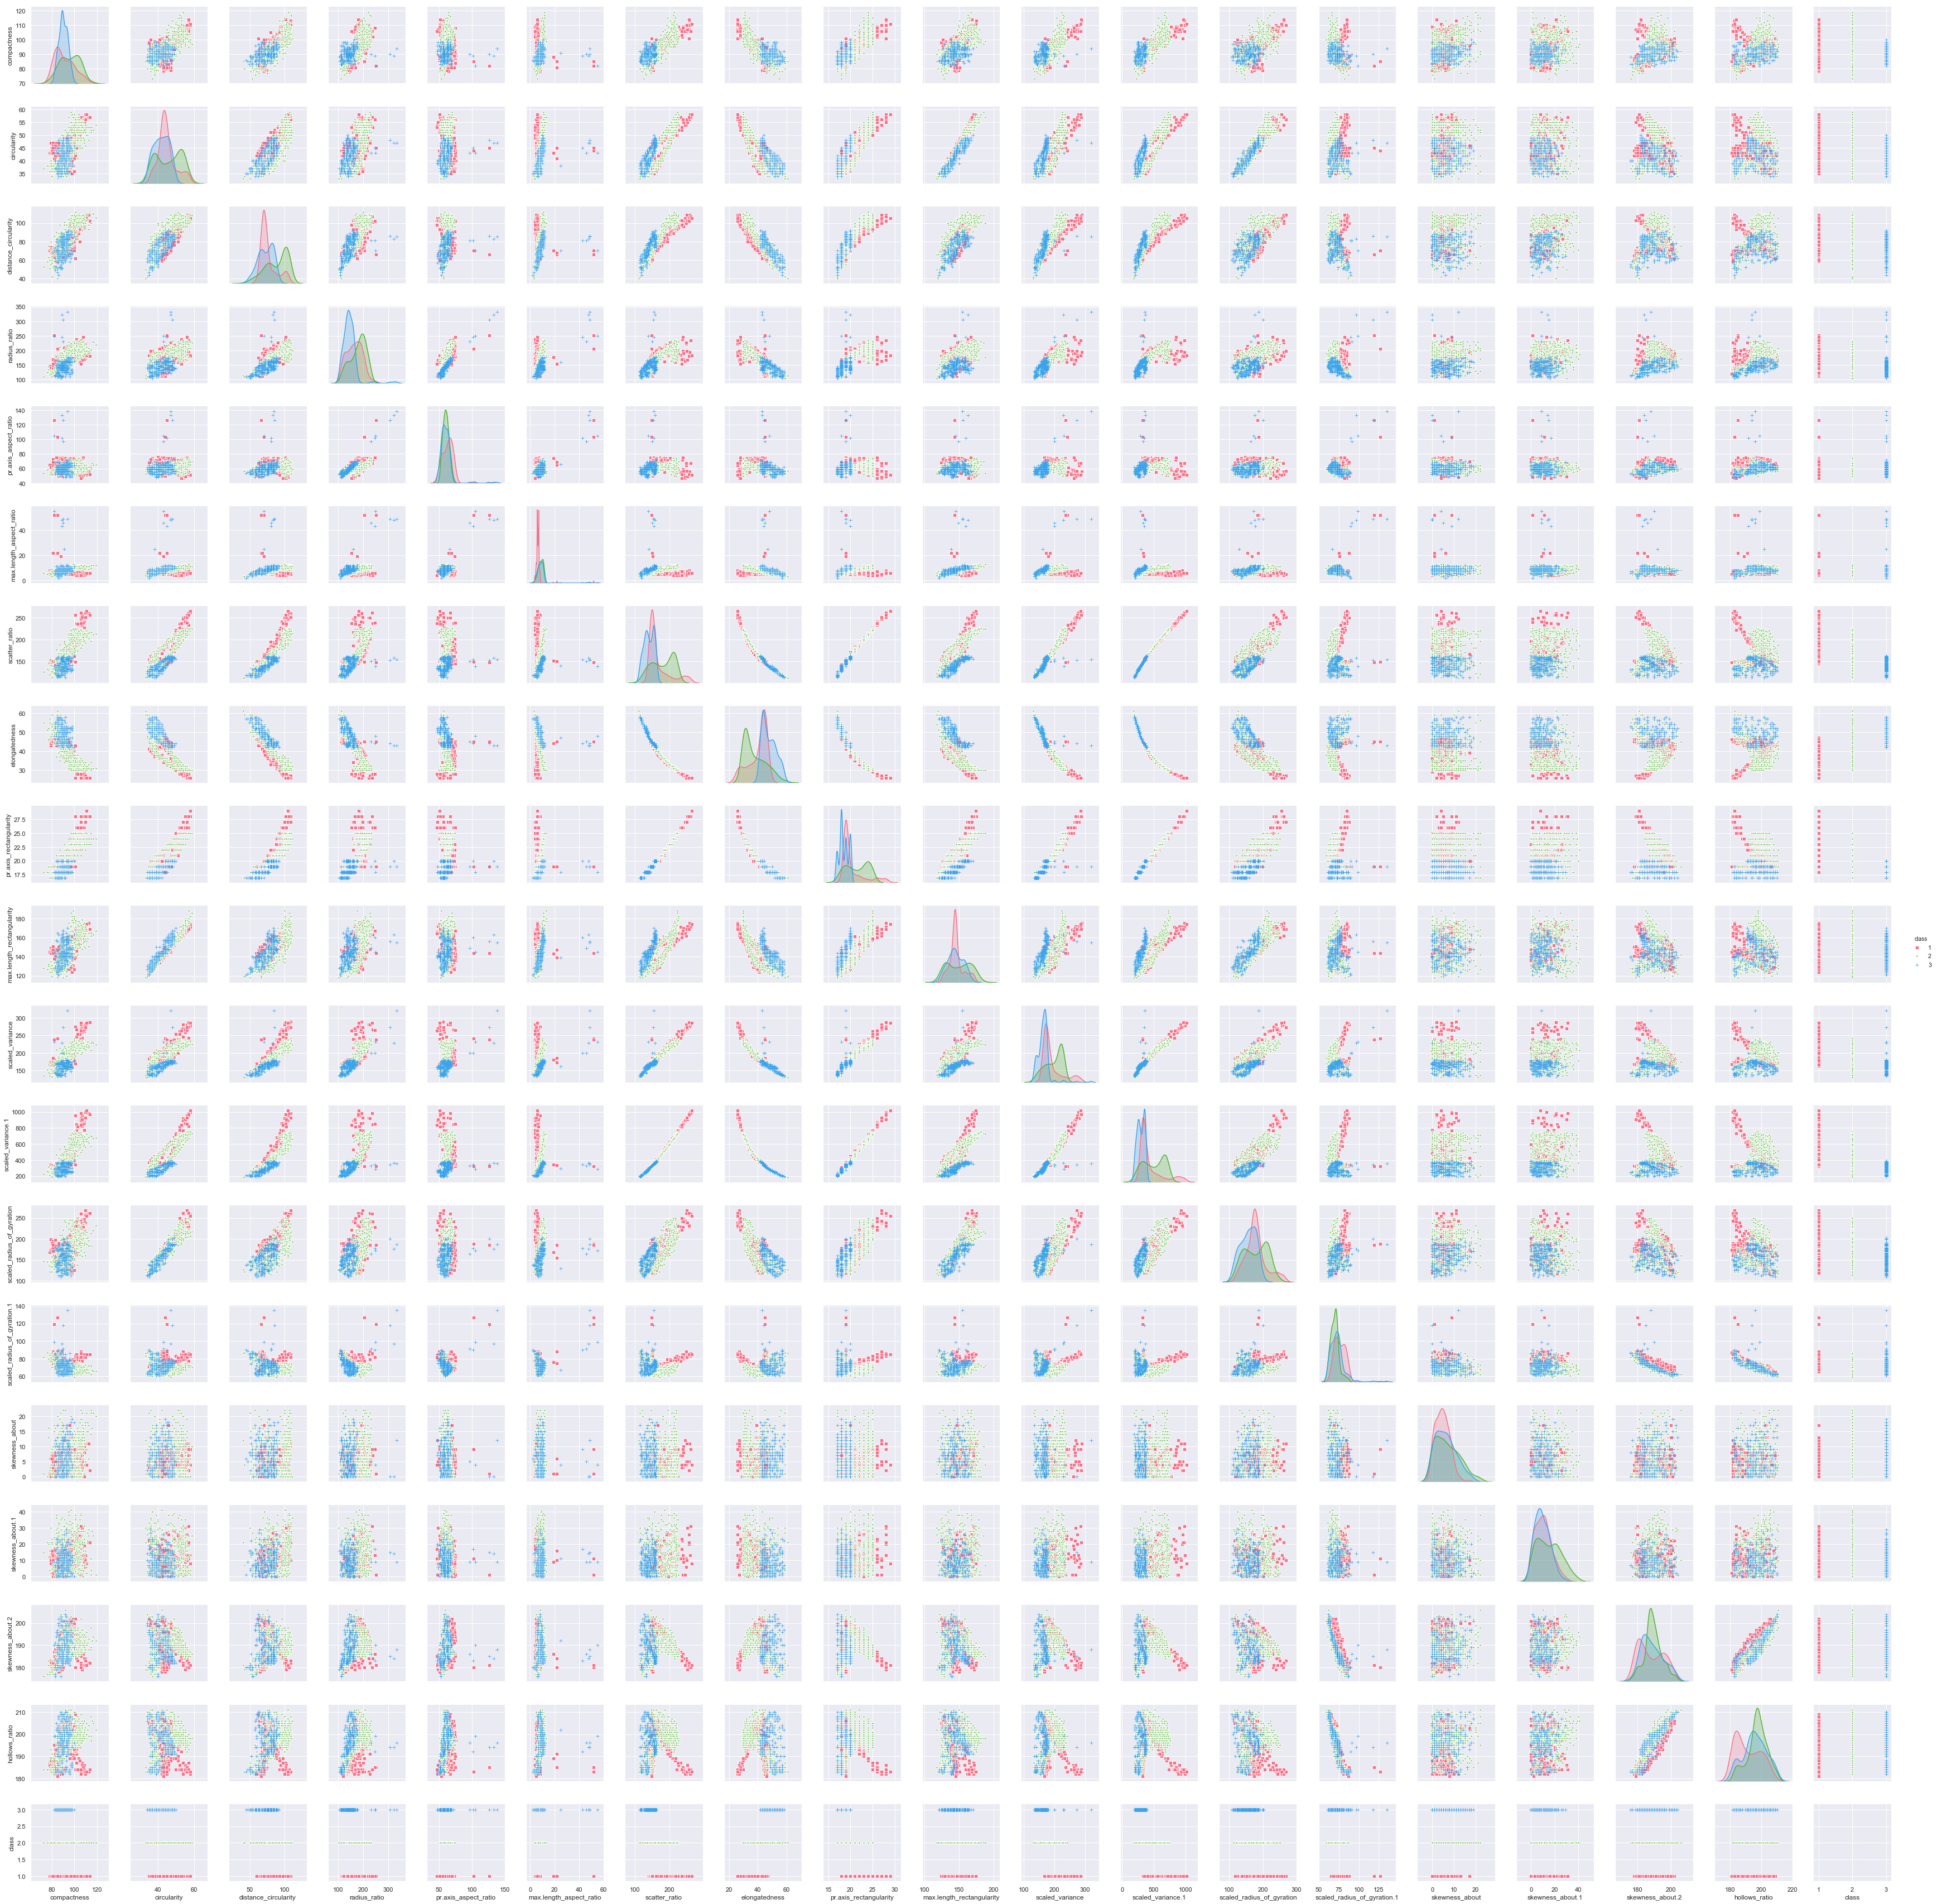

In [44]:
sns.pairplot(vehicle_new, hue="class", diag_kind = 'kde', palette="husl", markers=["s", "*", "+"])
plt.show()
# Class Legend: s (value = 1) - bus, * (value = 2) - car, + (value = 3) - van

#### Pair Panel Analysis
* High degree of correlation exists amongst vehicle attributes such as compactness, circularity, radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration


* To measure degree of correlation, correlation analysis using pearson coefficient is performed

#### Correlation Coefficient
- The correlation coefficient is also known as the Pearson product-moment correlation coefficient, is obtained by dividing the covariance of the two variables by the product of their standard deviations. 


- The values of the correlation coefficient can range from -1 to +1. The closer it is to +1 or -1, the more closely are the two variables are related. The positive sign signifies the direction of the correlation i.e. if one of the variables increases, the other variable is also supposed to increase.


- Now, if we look at the individual elements of the correlation matrix, the main diagonal all comprises of 1. This indicates that the correlation of an element with itself is 1, or the highest value possible.

In [45]:
# Correlation Matrix Table
corr = vehicle_new.corr()
cmap = cmap=sns.diverging_palette(255, 5, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "9pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '100px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '9pt'})\
    .set_caption("Hover to Magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

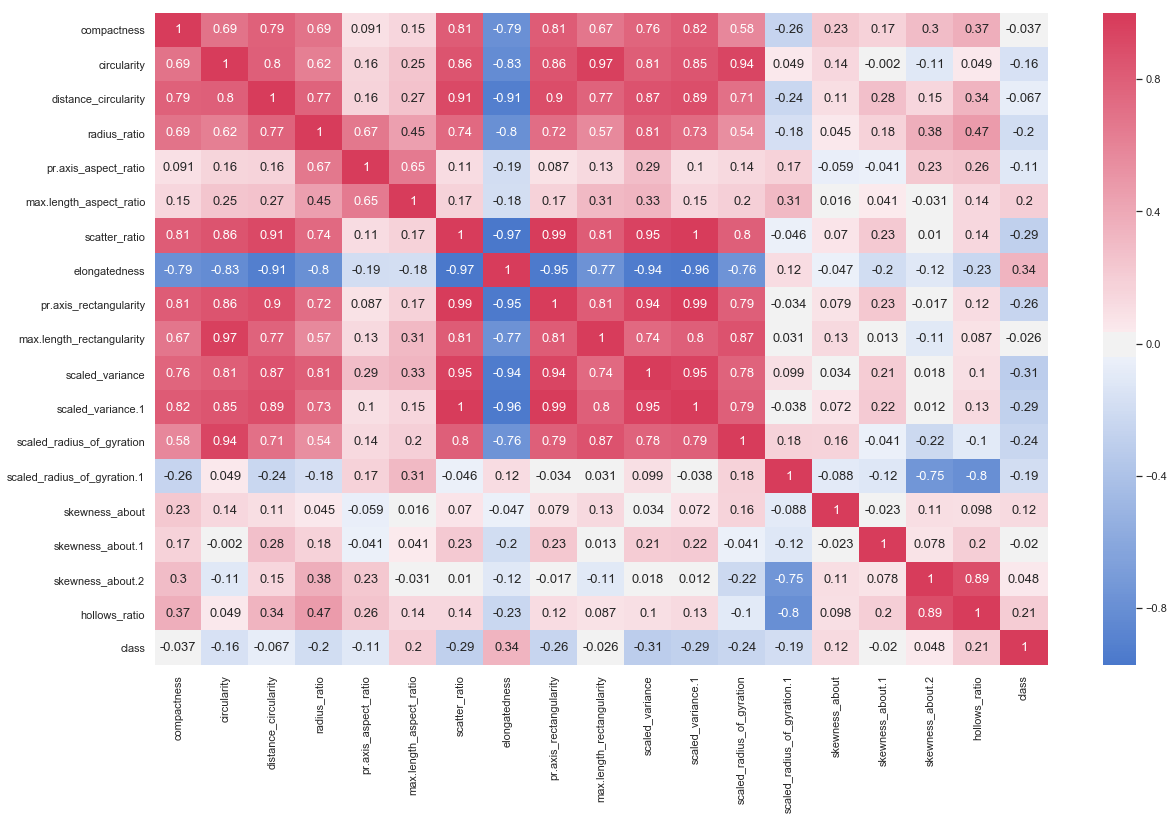

In [46]:
# Representing coorelation through heatmap
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, center=0, cmap=cmap, annot=True, annot_kws={"size": 13})
plt.show()

**Correlation Inferences**
* High degree of correlation exists across variables except pr.axis_aspect_ratio, scaled_ratio_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, and class (i.e. Corr. Coeff.: > 0.70)


* Correlation of **circularity** to max.length_rectangularity and scaled_radius_of_gyration variables, Correlation of **distance_circularity** to scatter_ratio, elongatedness, pr.axis_rectangularity and scaled_variance.1 variables, Correlation of **scatter_ratio** to distance_circularity, pr.axis_rectangularity, scaled_variance, and scaled_variance.1 variables, Correlation of **pr.axis_rectangularity** to scaled_varaince and scaled_variance.1 variables are very very high (i.e. Corr. Coeff. >0.90)


* **Elongatedness** is highly negatively correlated with most data attributes viz. compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration (i.e. Corr. Coeff.: >-0.75)


As variables are highly correlated or co-linear and hence can cause model overfitting or might run into the multicollinearity conundrum. Also, in plain English if two variables are so highly correlated they will obviously impart nearly exactly the same information to the model and by including both model will be weakened. No incremental information is added to the model instead model is infused with noise. Thus, pair of variables which are highly correlated can be removed to reduce dimensionality without much loss of information.

**Dropping correlated variables from vehicle data:** 
* Threshold considered - Correlation >= 0.90 (Correlation equal to or greater than 90%)
    - circularity has high degree of correlation with max.length_rectangularity (0.97), and scaled_radius_of_gyration (0.93), hence these variables are dropped
    - distance_circularity has high degree of correlation with scatter_ratio (0.91), elongatedness (-0.91), pr.axis_rectangularity (0.90), and scaled_variance.1 (0.90), hence these variables are dropped
    - scaled_radiuus_of_gyration.1 has high degree of correlation with hollows_ratio (-0.92), hence hollows_ratio variable is dropped


In [47]:
vehicle_fn = vehicle_new.drop(['max.length_rectangularity', 'scaled_radius_of_gyration', 'scatter_ratio', 
                                 'elongatedness','pr.axis_rectangularity','scaled_variance.1', 'hollows_ratio'], 
                                axis = 1)
vehicle_fn.shape

(813, 12)

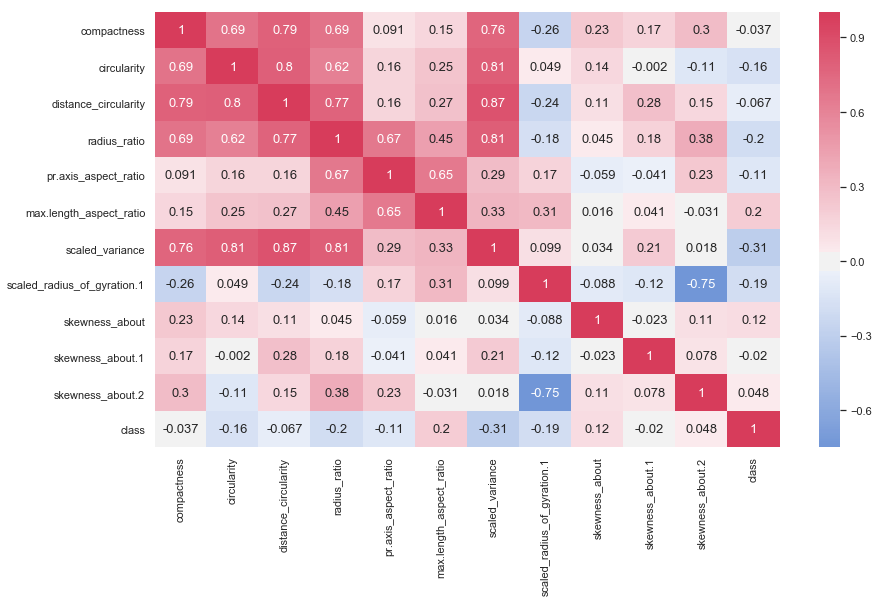

In [48]:
corr1 = vehicle_fn.corr()
cmap = cmap=sns.diverging_palette(255, 5, as_cmap=True)
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(corr1, center=0, cmap=cmap, annot=True, annot_kws={"size": 13})
plt.show()

**Depending upon data model requirements, threshold cut-off for correlated variables can be selected to remove multi-collinearity in the data.**